# Carrega DS principal

In [47]:
#Standard Includes
import sys
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import read_csv

#The Machine learning alogorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Test train split
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Just to switch off pandas warning
pd.options.mode.chained_assignment = None

# Used to write our model to a file
from joblib import dump, load
#dump(clf, 'filename.joblib') 
#clf = load('filename.joblib')

# Cross validation
from sklearn.metrics import confusion_matrix

# Accuracy
from sklearn.metrics import accuracy_score

# ROC
from sklearn.metrics import roc_auc_score, roc_curve

In [48]:
# Load dataset

df = pd.read_csv("darpa_normal_1500_500-1000.csv", low_memory=False)

In [49]:
df.shape

(1500, 7)

In [50]:
df.head()

,SSIP,SSP,SDFP,SDFB,SFE,RFIP,CLASS
0,168.000000,1.666667,19.888290,2.392433e+04,3496.666667,0.044805,1
1,6.666667,1.666667,4.959388,8.419640e+02,2363.000000,0.002821,0
2,6.666667,1.333333,231.629718,4.957847e+06,27560.000000,0.000242,0
3,1879.666667,1.666667,71.874174,8.147550e+04,15131.333333,0.122792,1
4,6.666667,1.333333,4.994750,8.539400e+02,712.000000,0.009359,0


In [51]:
df

,SSIP,SSP,SDFP,SDFB,SFE,RFIP,CLASS
0,168.000000,1.666667,19.888290,2.392433e+04,3496.666667,0.044805,1
1,6.666667,1.666667,4.959388,8.419640e+02,2363.000000,0.002821,0
2,6.666667,1.333333,231.629718,4.957847e+06,27560.000000,0.000242,0
3,1879.666667,1.666667,71.874174,8.147550e+04,15131.333333,0.122792,1
4,6.666667,1.333333,4.994750,8.539400e+02,712.000000,0.009359,0
...,...,...,...,...,...,...,...
1495,6.666667,1.666667,5.125086,8.757995e+02,2036.333333,0.003273,0
1496,6.666667,1.666667,5.242978,8.635694e+02,807.666667,0.008251,0
1497,7.000000,1.666667,706.941358,2.052666e+07,13023.333333,0.000537,0
1498,97.000000,2.000000,17.794491,2.116487e+04,1963.000000,0.046188,1


In [52]:
print(df.corr())

           SSIP       SSP      SDFP      SDFB       SFE      RFIP     CLASS
SSIP   1.000000 -0.010981 -0.132195 -0.167419  0.032862  0.005889  0.411766
SSP   -0.010981  1.000000  0.146193  0.146959  0.180907 -0.000505 -0.028177
SDFP  -0.132195  0.146193  1.000000  0.988015  0.671164 -0.022354 -0.369408
SDFB  -0.167419  0.146959  0.988015  1.000000  0.605759 -0.022881 -0.408558
SFE    0.032862  0.180907  0.671164  0.605759  1.000000 -0.012038 -0.157104
RFIP   0.005889 -0.000505 -0.022354 -0.022881 -0.012038  1.000000  0.051369
CLASS  0.411766 -0.028177 -0.369408 -0.408558 -0.157104  0.051369  1.000000


Fim do carregamento do DS principal


# Inicia o tratamento do DS para o ML (DS completo)

In [53]:
# Converte o string em float
#df['ip_src'] = pd.Categorical(df['ip_src'])
#df['ip_src'] = df.ip_src.cat.codes
#df['ip_dst'] = pd.Categorical(df['ip_dst'])
#df['ip_dst'] = df.ip_dst.cat.codes

In [54]:
# Aplica a escala por MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#df[["proto","ip_src","ip_dst","port_src","port_dst","length","time"]] = scaler.fit_transform(df[["proto","ip_src","ip_dst","port_src","port_dst","length","time"]])
df[["SSIP","SSP","SDFP","SDFB","SFE","RFIP"]] = scaler.fit_transform(df[["SSIP","SSP","SDFP","SDFB","SFE","RFIP"]])

# Escala os atributos utilizando scale
#df[["proto","ip_src","ip_dst","port_src","port_dst","length","time"]] = scale(df[["proto","ip_src","ip_dst","port_src","port_dst","length","time"]])
df[["SSIP","SSP","SDFP","SDFB","SFE","RFIP"]] = scale(df[["SSIP","SSP","SDFP","SDFB","SFE","RFIP"]])

In [55]:
# Atributos e class

#features = df[["port_src","port_dst","length","time"]]
features = df[["SSIP","SSP","SDFP","SDFB","SFE","RFIP",]]
target = df["CLASS"]

In [56]:
features

,SSIP,SSP,SDFP,SDFB,SFE,RFIP
0,0.001315,0.017553,-0.548321,-0.597516,-0.254369,-0.024552
1,-0.281750,0.017553,-0.607135,-0.600935,-0.285213,-0.037564
2,-0.281750,-1.737734,0.285860,0.133348,0.400328,-0.038363
3,3.004496,0.017553,-0.343516,-0.588991,0.062178,-0.000382
4,-0.281750,-1.737734,-0.606996,-0.600933,-0.330132,-0.035538
...,...,...,...,...,...,...
1495,-0.281750,0.017553,-0.606482,-0.600930,-0.294101,-0.037424
1496,-0.281750,0.017553,-0.606018,-0.600932,-0.327530,-0.035881
1497,-0.281165,0.017553,2.158407,2.439562,0.004825,-0.038272
1498,-0.123257,1.772839,-0.556570,-0.597924,-0.296096,-0.024123


In [57]:
features.describe()


,SSIP,SSP,SDFP,SDFB,SFE,RFIP
count,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03
mean,-1.421085e-17,3.434290e-17,-1.894781e-17,9.473903e-18,9.473903e-18,-1.657933e-17
std,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00
min,-2.905228e-01,-1.737734e+00,-6.266732e-01,-6.010596e-01,-3.494496e-01,-3.843203e-02
25%,-2.817501e-01,1.755287e-02,-6.056940e-01,-6.009252e-01,-3.303501e-01,-3.780073e-02
50%,-2.817501e-01,1.755287e-02,-5.584462e-01,-5.980324e-01,-3.016283e-01,-3.574073e-02
75%,-2.318920e-01,1.755287e-02,3.639903e-01,3.877444e-01,-1.855146e-01,-2.441360e-02
max,6.561526e+00,1.772839e+00,4.019335e+00,3.875232e+00,9.232212e+00,3.870236e+01


In [58]:
# Dados de treino
featureTrain, featureTest, targetTrain, targetTest = train_test_split(features, target, test_size = .20, random_state = 42)

# Gridsearch

## Gridsearch sem fibo

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
   'n_estimators': [1, 3, 5, 7, 10, 25, 50, 75, 80, 100, 500],
   'criterion': ['entropy', 'gini'],
   'min_samples_split': [2, 20, 40, 50],
   'min_samples_leaf': [None, 1, 40, 100],
   'max_depth': [None, 2, 3, 4, 5, 10],
   'max_leaf_nodes': [None, 2, 3, 5, 12, 17],
   'max_features': [1, 2, 3, 4, 5],
   'random_state': [None, 10, 20, 42, 66, 72, 80, 100],
}
# Parâmetros

# Create the grid search object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=10)

# Fit the grid search to the data
grid_search.fit(features, target)

# Print the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)

## Gridsearch com fibo

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Define the parameter grid
# Parâmetros em fibonacci
param_grid = {
    'n_estimators': [1, 2, 3, 5, 8, 13, 21, 34],
    'criterion': ['entropy', 'gini'],
    'min_samples_split': [2, 3, 5, 8, 13, 21, 34],
    'min_samples_leaf': [1, 2, 3, 5, 8, 13, 21],
    'max_depth': [None, 1, 2, 3, 5, 8, 13],
    'max_leaf_nodes': [None, 2, 3, 5, 8, 13],
    'max_features': [1, 2, 3, 4, 5, 6],
    'random_state': [None, 1, 2, 3, 5, 8, 13, 21, 34],
}

# Create the grid search object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=10)

# Fit the grid search to the data
grid_search.fit(features, target)

# Print the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)

KeyboardInterrupt: 

# Início do Machine Learning para o DS tratado (DS completo ou SubDS)

## RF sem fibo

In [36]:
# Cria modelo
clf = RandomForestClassifier(n_estimators = 7,
                             criterion = "entropy",
                             min_samples_split = 20,
                             min_samples_leaf = 1,
                             max_depth = None,
                             verbose = True,
                             max_leaf_nodes = 5,
                             random_state = None,
                             max_features = 2,
                             n_jobs = 32
                            )


## RF com fibo

In [60]:
clf = RandomForestClassifier(n_estimators = 3,
                             criterion = "entropy",
                             min_samples_split = 8,
                             min_samples_leaf = 1,
                             max_depth = None,
                             verbose = True,
                             max_leaf_nodes = None,
                             random_state = None,
                             max_features = 1,
                             n_jobs = 32
                            )

## Inicia o ML

In [61]:
clf

RandomForestClassifier(criterion='entropy', max_features=1, min_samples_split=8,
                       n_estimators=3, n_jobs=32, verbose=True)

In [62]:
# Constrói o modelo
clf = clf.fit(features, target)

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   3 out of   3 | elapsed:    0.0s finished


In [63]:
# Treino
model = clf.fit(featureTrain, targetTrain)
prever = model.predict(featureTest)

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished


# RF sem fibo

## Acurácia

In [40]:
# Calcula a acurácia
import csv
scores = clf.score(features, target)
print('Acurácia de predição:',scores*100)

with open('acuracia_rf_darpa_gridsearch.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Acuracia'])
    writer.writerow([scores*100])

Acurácia de predição: 99.93333333333332


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:    0.0s finished


## Importância dos atributos

In [41]:
# Extraindo a importância
importances = clf.feature_importances_
indices = np.argsort(importances)

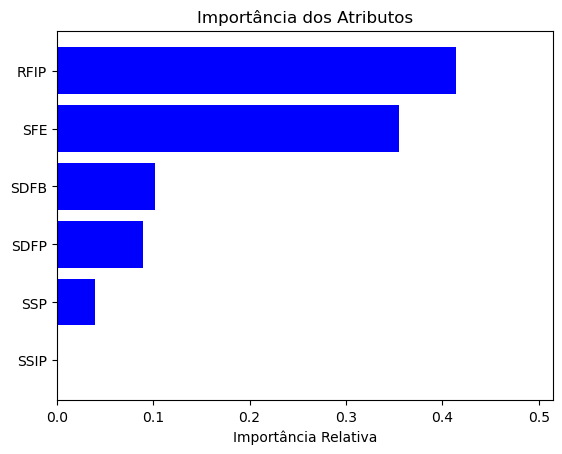

In [42]:
# Plot da Importância dos Atributos
plt.figure(1)
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)),features)
plt.xticks(np.arange(0, max(importances[indices])+0.1, 0.1))
plt.xlim(0, max(importances[indices])+0.1)
plt.xlabel('Importância Relativa')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.savefig('imp_rf_darpa_gridsearch.svg', format='svg')
plt.show()


## F1 SCORE

In [43]:
from sklearn.metrics import f1_score

# Fit the model on the training data
clf.fit(featureTrain, targetTrain)

# Make predictions on the test data
targetPred = clf.predict(featureTest)

# Calculate the F1 score
f1 = f1_score(targetTest, targetPred)

print("Acurácia F1: ", f1)

with open('acuracia_rf_darpa_gridsearch.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Acuracia'])
    writer.writerow([f1])

Acurácia F1:  1.0


[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:    0.0s finished


## ROC

In [44]:
from sklearn.metrics import roc_curve, auc

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:    0.0s finished


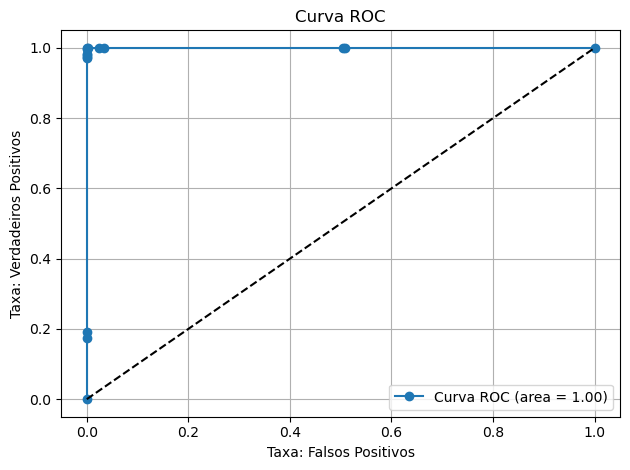

Acurácia ROC: 1.00


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:    0.0s finished


In [45]:
fpr, tpr, _ = roc_curve(target, clf.predict_proba(features)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (area = %0.2f)' % roc_auc, marker='o')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Taxa: Falsos Positivos')#False Positive Rate
plt.ylabel('Taxa: Verdadeiros Positivos')#True Positive Rate
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig('roc_rf_darpa_gridsearch.svg', format='svg')
plt.show()
# Previsão das classes
pred_classes = clf.predict(features)

# Cálculo da acurácia
accuracy = accuracy_score(target, pred_classes)

print(f'Acurácia ROC: {accuracy:.2f}')

with open('roc_rf_darpa_gridsearch.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Acuracia'])
    writer.writerow([accuracy])

## Matriz de confusão

[[0.0073787  0.9926213 ]
 [0.99690145 0.00309855]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [0.0073787  0.9926213 ]
 [0.99690145 0.00309855]]
Accuracy = 99.93333333333332%
----Confusion Matrix-----
[[1022    0]
 [   1  477]]


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:    0.0s finished


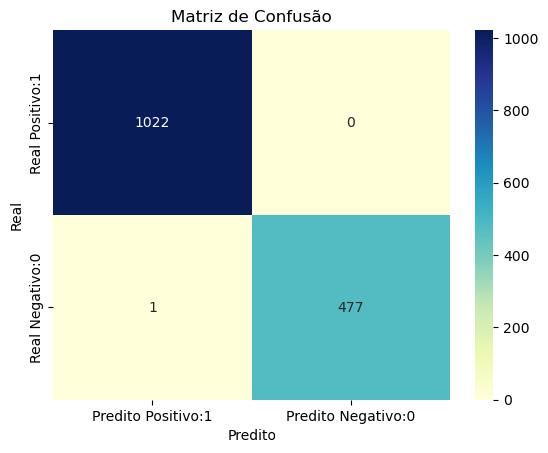

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Predict the Attack
pred = clf.predict_proba(features)
print(pred)

# Calculate the Accuracy
accuracy = clf.score(features, target)
print("Accuracy = {}%".format(accuracy * 100))

# Calculate Confusion Matrix
cm = confusion_matrix(target, pred.argmax(axis=1))
print("----Confusion Matrix-----")
print(cm)

# Visualize Confusion Matrix with Seaborn Heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Predito Positivo:1', 'Predito Negativo:0'], 
                                 index=['Real Positivo:1', 'Real Negativo:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Predito')
plt.savefig('matriz_rf_darpa_gridsearch.svg', format='svg')
plt.show()

# Salvar a AUC em um arquivo CSV
with open('matriz_rf_darpa_gridsearch.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Matriz'])
    writer.writerow([accuracy * 100])

# RF com fibo

## Acurácia

In [64]:
# Calcula a acurácia
import csv
scores = clf.score(features, target)
print('Acurácia de predição:',scores*100)

with open('acuracia_rf_darpa_gridsearch_fibo.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Acuracia'])
    writer.writerow([scores*100])

Acurácia de predição: 100.0


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished


## Importância dos atributos

In [65]:
# Extraindo a importância
importances = clf.feature_importances_
indices = np.argsort(importances)

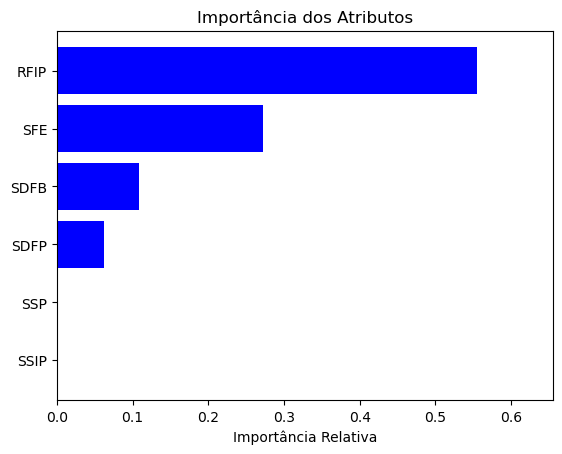

In [66]:
# Plot da Importância dos Atributos
plt.figure(1)
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)),features)
plt.xticks(np.arange(0, max(importances[indices])+0.1, 0.1))
plt.xlim(0, max(importances[indices])+0.1)
plt.xlabel('Importância Relativa')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.savefig('imp_rf_darpa_gridsearch_fibo.svg', format='svg')
plt.show()


## F1 SCORE

In [67]:
from sklearn.metrics import f1_score

# Fit the model on the training data
clf.fit(featureTrain, targetTrain)

# Make predictions on the test data
targetPred = clf.predict(featureTest)

# Calculate the F1 score
f1 = f1_score(targetTest, targetPred)

print("Acurácia F1: ", f1)

with open('acuracia_rf_darpa_gridsearch_fibo.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Acuracia'])
    writer.writerow([f1])

Acurácia F1:  1.0


[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished


## ROC

In [68]:
from sklearn.metrics import roc_curve, auc

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished


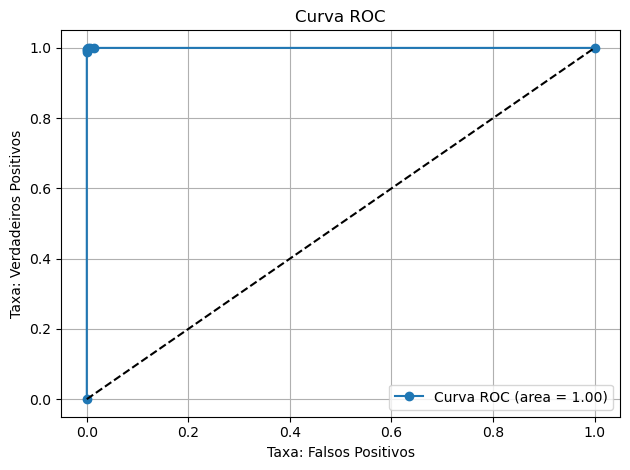

Acurácia ROC: 1.00


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished


In [69]:
fpr, tpr, _ = roc_curve(target, clf.predict_proba(features)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (area = %0.2f)' % roc_auc, marker='o')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Taxa: Falsos Positivos')#False Positive Rate
plt.ylabel('Taxa: Verdadeiros Positivos')#True Positive Rate
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig('roc_rf_darpa_gridsearch_fibo.svg', format='svg')
plt.show()
# Previsão das classes
pred_classes = clf.predict(features)

# Cálculo da acurácia
accuracy = accuracy_score(target, pred_classes)

print(f'Acurácia ROC: {accuracy:.2f}')

with open('roc_rf_darpa_gridsearch_fibo.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Acuracia'])
    writer.writerow([accuracy])

## Matriz de confusão

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
Accuracy = 99.86666666666667%
----Confusion Matrix-----
[[1022    0]
 [   2  476]]


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished


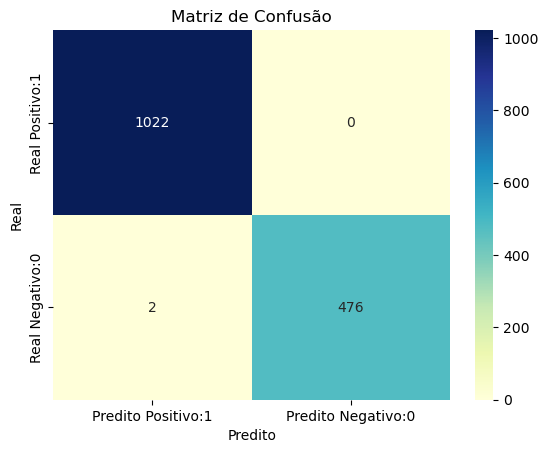

In [70]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Predict the Attack
pred = clf.predict_proba(features)
print(pred)

# Calculate the Accuracy
accuracy = clf.score(features, target)
print("Accuracy = {}%".format(accuracy * 100))

# Calculate Confusion Matrix
cm = confusion_matrix(target, pred.argmax(axis=1))
print("----Confusion Matrix-----")
print(cm)

# Visualize Confusion Matrix with Seaborn Heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Predito Positivo:1', 'Predito Negativo:0'], 
                                 index=['Real Positivo:1', 'Real Negativo:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Predito')
plt.savefig('matriz_rf_darpa_gridsearch_fibo.svg', format='svg')
plt.show()

# Salvar a AUC em um arquivo CSV
with open('matriz_rf_darpa_gridsearch_fibo.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Matriz'])
    writer.writerow([accuracy * 100])

# GRAVA O CLASSIFICADOR

In [ ]:
# Grava o clf para um arquivo
dump(clf, 'cls_caida_rf.joblib') 

# Carrega o clf de um arquivo
#clf = load('classifier_rf.joblib')